In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pylab import mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import read_mist_models

In [5]:
isocmd = read_mist_models.ISOCMD('MIST_iso_604a1d34154e3.iso.cmd')

print ('version: ', isocmd.version)
print ('photometric system: ', isocmd.photo_sys)
print ('abundances: ', isocmd.abun)
print ('rotation: ', isocmd.rot)
print ('ages: ', [round(x,2) for x in isocmd.ages])
print ('number of ages: ', isocmd.num_ages)
print ('available columns: ', isocmd.hdr_list)
print ('Av extinction: ', isocmd.Av_extinction)

Reading in: MIST_iso_604a1d34154e3.iso.cmd
version:  {'MIST': '1.2', 'MESA': '7503'}
photometric system:  SDSS (AB)
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.4
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'SDSS_u', 'SDSS_g', 'SDSS_r',

In [6]:
#Cluster directories:
# M35_dir = 'M35'
M67_dir = 'M67'
M67v2_dir = 'M67v2'
# NGC869_dir = 'NGC869'

#Setting Cluster to process
cluster_dir = M67_dir #################################################################################

if cluster_dir == 'M67v2':
    cluster_name = "M67 300ms"
elif cluster_dir == 'M67':
    cluster_name = "M67 120ms"

#Output directories to shared and local folders
shared_dir = os.path.join('/data/observatory/student_data/William_ODonnell', cluster_dir)
local_dir = cluster_dir

In [7]:
Final_df = pd.read_csv(os.path.join(local_dir, "4. " + cluster_dir + '_Final_Corrected_Mags.csv')) 
Magnitudes = Final_df.values
G_mag = Magnitudes[0:,4]
G_mag_err = Magnitudes[0:,5]
I_mag = Magnitudes[0:,6]
I_mag_err = Magnitudes[0:,7]
R_mag = Magnitudes[0:,8]
R_mag_err = Magnitudes[0:,9]

G_R = G_mag - R_mag
G_I = G_mag - I_mag
R_I = R_mag - I_mag

print("--------------------------------")
print("G Mag")
G_avg = np.mean(G_mag)
print("Average G-band Mag is: {0:.2f}".format(G_avg))
G_err_avg = np.mean(G_mag_err)
print("Average Err: {0:.2f}".format(G_err_avg))
print("Average Percentage Err: {0:.2f}%".format(G_err_avg*100/np.mean(G_mag)))
G_min = np.min(G_mag)
print("Minumum Err: {0:.2f}".format(G_min))
G_err_min = np.min(G_mag_err)
print("Minumum Err: {0:.2f}".format(G_err_min))
G_max = np.max(G_mag)
print("Maximum Err: {0:.2f}".format(G_max))
G_err_max = np.max(G_mag_err)
print("Maximum Err: {0:.2f}".format(G_err_max))

print("--------------------------------")
print("I Mag errors")
I_avg = np.mean(I_mag)
print("Average G-band Mag is: {0:.2f}".format(I_avg))
I_err_avg = np.mean(I_mag_err)
print("Average Err: {0:.2f}".format(I_err_avg))
print("Average Percentage Err: {0:.2f}%".format(I_err_avg*100/np.mean(I_mag)))
I_min = np.min(I_mag)
print("Minumum Mag: {0:.2f}".format(I_min))
I_err_min = np.min(I_mag_err)
print("Minumum Err: {0:.2f}".format(I_err_min))
I_max = np.max(I_mag)
print("Maximum Mag: {0:.2f}".format(I_max))
I_err_max = np.max(I_mag_err)
print("Maximum Err: {0:.2f}".format(I_err_max))

print("--------------------------------")
print("R Mag errors")
R_avg = np.mean(R_mag)
print("Average G-band Mag is: {0:.2f}".format(R_avg))
R_err_avg = np.mean(R_mag_err)
print("Average Err: {0:.2f}".format(R_err_avg))
print("Average Percentage Err: {0:.2f}%".format(R_err_avg*100/np.mean(R_mag)))
R_min = np.min(R_mag)
print("Minumum Mag: {0:.2f}".format(R_min))
R_err_min = np.min(R_mag_err)
print("Minumum Err: {0:.2f}".format(R_err_min))
R_max = np.max(R_mag)
print("Maximum Mag: {0:.2f}".format(R_max))
R_err_max = np.max(R_mag_err)
print("Maximum Err: {0:.2f}".format(R_err_max))

print("--------------------------------")
print("G-I Mag errors")
G_I_err = np.sqrt(G_mag_err**2 + I_mag_err**2)
#print(G_I_err)
G_I_perc = (G_I_err * 100)/G_I
print(np.mean(G_I_perc))


# G_I_err_avg = np.mean(G_I_mag_err)
# print("Average Err: {0:.2f}".format(G_I_err_avg))
# print("Average Percentage Err: {0:.2f}%".format((G_I_err_avg*100)/np.mean(R_mag)))
# R_min = np.min(G_I_mag)
# print("Minumum Mag: {0:.2f}".format(R_min))
# R_err_min = np.min(G_I_mag_err)
# print("Minumum Err: {0:.2f}".format(R_err_min))
# R_max = np.max(G_I_mag)
# print("Maximum Mag: {0:.2f}".format(R_max))
# R_err_max = np.max(G_I_mag_err)
# print("Maximum Err: {0:.2f}".format(R_err_max))

--------------------------------
G Mag
Average G-band Mag is: 14.08
Average Err: 0.10
Average Percentage Err: 0.72%
Minumum Err: 8.39
Minumum Err: 0.06
Maximum Err: 17.11
Maximum Err: 0.12
--------------------------------
I Mag errors
Average G-band Mag is: 13.45
Average Err: 0.10
Average Percentage Err: 0.71%
Minumum Mag: 7.23
Minumum Err: 0.05
Maximum Mag: 15.98
Maximum Err: 0.11
--------------------------------
R Mag errors
Average G-band Mag is: 13.50
Average Err: 0.09
Average Percentage Err: 0.66%
Minumum Mag: 7.47
Minumum Err: 0.05
Maximum Mag: 16.43
Maximum Err: 0.11
--------------------------------
G-I Mag errors
20.984142926865907


In [8]:
# mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

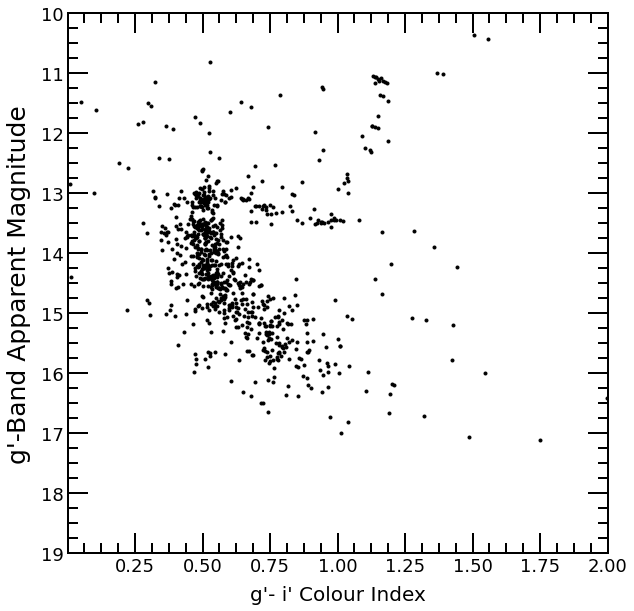

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

ax.plot(G_I, G_mag, ".", color = "Black")

plt.xlim(left = 0.0001)
plt.xlim(right = 2.0)
plt.ylim(top = 19)
plt.ylim(bottom = 10)
plt.gca().invert_yaxis()

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.0625))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
plt.tick_params(which='major', size=20, width=2, direction='in', top='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', top='on')
plt.tick_params(which='major', size=20, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', right='on')

plt.xlabel("g'- i' Colour Index", labelpad = 10, fontsize = 20)
plt.ylabel("g'-Band Apparent Magnitude", labelpad = 10, fontsize = 25)
#plt.title(cluster_name + " " + "Colour-Magnitude Diagram", pad = 10, fontsize = 25)

plt.savefig(os.path.join(local_dir, "5. " + cluster_dir +  "_RAW_Plot.pdf"), bbox_inches = 'tight',
    pad_inches = 0)

Text(0, 0.5, "g'-Band Apparent Magnitude")

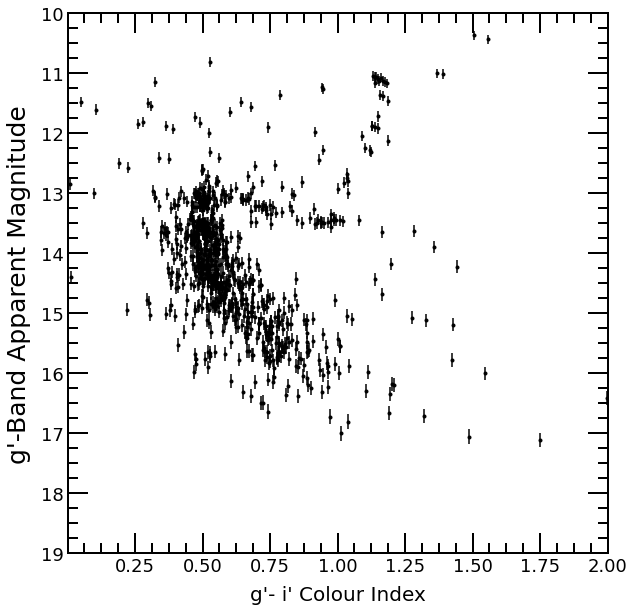

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

plt.errorbar(G_I, G_mag, yerr = G_mag_err, fmt = ".", color = 'black')

plt.xlim(left = 0.0001)
plt.xlim(right = 2.0)
plt.ylim(top = 19)
plt.ylim(bottom = 10)
plt.gca().invert_yaxis()

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.0625))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
plt.tick_params(which='major', size=20, width=2, direction='in', top='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', top='on')
plt.tick_params(which='major', size=20, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', right='on')

plt.xlabel("g'- i' Colour Index", labelpad = 10, fontsize = 20)
plt.ylabel("g'-Band Apparent Magnitude", labelpad = 10, fontsize = 25)
#plt.title(cluster_name + " " + "Colour-Magnitude Diagram", pad = 10, fontsize = 25)

# plt.savefig(os.path.join(local_dir, "5. " + cluster_dir +  "Errorbar_Plot.pdf"), bbox_inches = 'tight',
#     pad_inches = 0)

Age of Cluster (Gyr): 4.395416154378252
Distance (pc): 834.8337537236507
Reddening(g' - r') is: 0.07


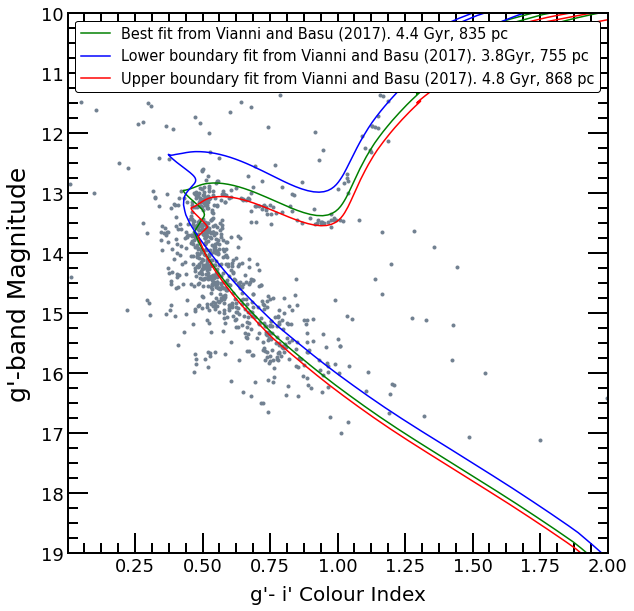

In [11]:
#Plotting a G-I, G colour-mag diagram.

age_guess = 9.643
distance_mod_guess = 9.608
Reddening = 0.07

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

ax.plot(G_I, G_mag, ".", color = "slategrey")
plt.xlim(left = 0.0001)
plt.xlim(right = 2.0)
plt.ylim(top = 19)
plt.ylim(bottom = 10)
plt.gca().invert_yaxis()
# plt.errorbar(G_R, G_mag, yerr = G_mag_err, fmt = ".", color = 'black')

age_ind = isocmd.age_index(age_guess) # A guess at the cluster age, turning point, to be refined to fit data
G1 = isocmd.isocmds[age_ind]['SDSS_g']
R1 = isocmd.isocmds[age_ind]['SDSS_r']
I1 = isocmd.isocmds[age_ind]['SDSS_i']
ax.plot(G1-I1 + Reddening, G1 + distance_mod_guess, color = "Green", label = "Best fit from Vianni and Basu (2017). 4.4 Gyr, 835 pc")# the distance modulus mu=m-M, scales the isochrone data from absolute to apparant magnitude and thus gives distance, a guess to be refined to fit data

age_ind = isocmd.age_index(9.5563) # A MINIMUM guess at the cluster age, turning point, to be refined to fit data
G2 = isocmd.isocmds[age_ind]['SDSS_g']
R2 = isocmd.isocmds[age_ind]['SDSS_r']
I2 = isocmd.isocmds[age_ind]['SDSS_i']
ax.plot(G2-I2 + Reddening, G2 + 9.3897, color = "Blue", label = "Lower boundary fit from Vianni and Basu (2017). 3.8Gyr, 755 pc")

age_ind = isocmd.age_index(9.6812) # A MAXIMUM guess at the cluster age, turning point, to be refined to fit data
G3 = isocmd.isocmds[age_ind]['SDSS_g']
R3 = isocmd.isocmds[age_ind]['SDSS_r']
I3 = isocmd.isocmds[age_ind]['SDSS_i']
ax.plot(G3-I3 + Reddening, G3 + 9.6926, color = "Red", label = "Upper boundary fit from Vianni and Basu (2017). 4.8 Gyr, 868 pc")

# age_ind = isocmd.age_index(9.685) # A guess at the cluster age, turning point, to be refined to fit data
# G1 = isocmd.isocmds[age_ind]['SDSS_g']
# R1 = isocmd.isocmds[age_ind]['SDSS_r']
# I1 = isocmd.isocmds[age_ind]['SDSS_i']
# plt.plot(G1-R1 + Reddening, G1 + 9.675, color = "Yellow", label = "Our best fit")# the distance modulus mu=m-M, scales the isochrone data from absolute to apparant magnitude and thus gives distance, a guess to be refined to fit data

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.0625))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
plt.tick_params(which='major', size=20, width=2, direction='in', top='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', top='on')
plt.tick_params(which='major', size=20, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', right='on')

plt.xlabel("g'- i' Colour Index", labelpad = 10, fontsize = 20)
ax.set_ylabel("g'-band Magnitude", labelpad = 10, fontsize = 25)
#ax.set_title(cluster_name + " " + "Reference Isochrones Colour-Magnitude Diagram", pad = 10,fontsize = 20)

plt.legend(fancybox = True, loc = "upper center", fontsize = 14.5, framealpha = 1, edgecolor = 'black')
plt.savefig(os.path.join(local_dir, "5. " + cluster_dir +  "_Reference_Isochrone_Plots.pdf"), bbox_inches = 'tight',
    pad_inches = 0)

print("Age of Cluster (Gyr):",(10**(age_guess))/1000000000)
print("Distance (pc):", (10**((distance_mod_guess+5)/5)) )
print("Reddening(g' - r') is:", Reddening)

Age of Cluster: 4.7 Gyr
Distance: 891 Parsecs
Reddening(g' - i') is: 0.07


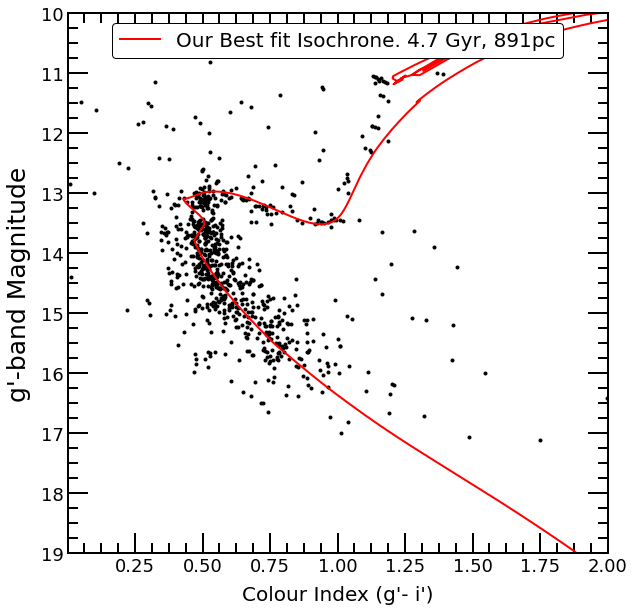

In [11]:
# age_guess = 9.6621  #Dont go higher than 6812
# distance_mod_guess = 9.6926 #Dont go higher than 6926

age_guess = 9.675  #9.685
distance_mod_guess = 9.75 #9.675
Reddening = 0.07

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.75,0.75])

ax.plot(G_I, G_mag, ".", color = "black")
plt.xlim(left = 0.0001)
plt.xlim(right = 2.0)
plt.ylim(top = 19)
plt.ylim(bottom = 10)
plt.gca().invert_yaxis()

age_ind = isocmd.age_index(age_guess) # A guess at the cluster age, turning point, to be refined to fit data
G4 = isocmd.isocmds[age_ind]['SDSS_g']
R4 = isocmd.isocmds[age_ind]['SDSS_r']
I4 = isocmd.isocmds[age_ind]['SDSS_i']

plt.plot(G4 - I4 + Reddening, G4 + distance_mod_guess, color = "Red", label = "Our Best fit Isochrone. 4.7 Gyr, 891pc", linewidth = "2")# the distance modulus mu=m-M, scales the isochrone data from absolute to apparant magnitude and thus gives distance, a guess to be refined to fit data

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.0625))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
plt.tick_params(which='major', size=20, width=2, direction='in', top='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', top='on')
plt.tick_params(which='major', size=20, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', right='on')

ax.set_xlabel("Colour Index (g'- i')", labelpad = 10, fontsize = 20)
ax.set_ylabel("g'-band Magnitude", labelpad = 10, fontsize = 25)
#ax.set_title(cluster_name + " " + "Colour-Magnitude Diagram with Isochrone Fit", pad = 10,fontsize = 19)
plt.legend(fancybox = True, loc = "upper center", fontsize = 20, framealpha = 1, edgecolor = 'black')
#plt.legend(fancybox = True, loc = "upper left", fontsize = 12, framealpha = 1, edgecolor = 'black')

plt.savefig(os.path.join(local_dir, "5. " + cluster_dir +  "_Isochrone_Plot.pdf"), bbox_inches = 'tight',
    pad_inches = 0)

print("Age of Cluster: {0:.1f} Gyr".format((10**(age_guess))/1000000000))
print("Distance: {0:.0f} Parsecs".format((10**((distance_mod_guess+5)/5))))
print("Reddening(g' - i') is: {0:.2f}".format(Reddening))

In [13]:
print("Distance: {0:.0f} Parsecs".format((10**((9.66+5)/5))))

Distance: 855 Parsecs


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

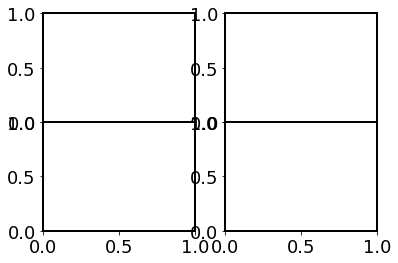

In [23]:
fig, ax = plt.subplots(2,2, sharex = True)
fig.subplots_adjust(hspace=0)

# fig = plt.figure(figsize=(10, 15))
# ax = fig.add_axes([0.1,0.1,0.75,0.75])

ax[0].plot(G_I, G_mag, ".", color = "Black")

ax[0].xaxis.set_major_locator(MultipleLocator(0.5))
ax[0].xaxis.set_minor_locator(MultipleLocator(0.125))
ax[0].yaxis.set_major_locator(MultipleLocator(1))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.25))
plt.tick_params(which='major', size=30, width=2, direction='in', top='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', top='on')
plt.tick_params(which='major', size=30, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', right='on')



ax[1].plot(G_I, G_mag, ".", color = 'blue')

ax[1].xaxis.set_major_locator(MultipleLocator(0.5))
ax[1].xaxis.set_minor_locator(MultipleLocator(0.125))
ax[1].yaxis.set_major_locator(MultipleLocator(1))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.25))
# plt.tick_params(which='major', size=30, width=2, direction='in', top='on')
# plt.tick_params(which='minor', size=10, width=2, direction='in', top='on')
# plt.tick_params(which='major', size=30, width=2, direction='in', right='on')
# plt.tick_params(which='minor', size=10, width=2, direction='in', right='on')




age_guess = 9.643
distance_mod_guess = 9.608
Reddening = 0.07

ax[2].plot(G_I, G_mag, ".", color = "slategrey")


age_ind = isocmd.age_index(age_guess) # A guess at the cluster age, turning point, to be refined to fit data
G1 = isocmd.isocmds[age_ind]['SDSS_g']
R1 = isocmd.isocmds[age_ind]['SDSS_r']
I1 = isocmd.isocmds[age_ind]['SDSS_i']
ax[2].plot(G1-I1 + Reddening, G1 + distance_mod_guess, color = "Green", label = "Best fit from Vianni and Basu (2017). 4.4 Gyr, 835 pc")# the distance modulus mu=m-M, scales the isochrone data from absolute to apparant magnitude and thus gives distance, a guess to be refined to fit data

age_ind = isocmd.age_index(9.5563) # A MINIMUM guess at the cluster age, turning point, to be refined to fit data
G2 = isocmd.isocmds[age_ind]['SDSS_g']
R2 = isocmd.isocmds[age_ind]['SDSS_r']
I2 = isocmd.isocmds[age_ind]['SDSS_i']
ax[2].plot(G2-I2 + Reddening, G2 + 9.3897, color = "Blue", label = "Lower boundary fit. 3.8Gyr, 755 pc")

age_ind = isocmd.age_index(9.6812) # A MAXIMUM guess at the cluster age, turning point, to be refined to fit data
G3 = isocmd.isocmds[age_ind]['SDSS_g']
R3 = isocmd.isocmds[age_ind]['SDSS_r']
I3 = isocmd.isocmds[age_ind]['SDSS_i']
ax[2].plot(G3-I3 + Reddening, G3 + 9.6926, color = "Red", label = "Upper boundary fit. 4.8 Gyr, 868 pc")

ax[2].xaxis.set_major_locator(MultipleLocator(0.5))
ax[2].xaxis.set_minor_locator(MultipleLocator(0.125))
ax[2].yaxis.set_major_locator(MultipleLocator(1))
ax[2].yaxis.set_minor_locator(MultipleLocator(0.25))
# plt.tick_params(which='major', size=30, width=2, direction='in', top='on')
# plt.tick_params(which='minor', size=10, width=2, direction='in', top='on')
# plt.tick_params(which='major', size=30, width=2, direction='in', right='on')
# plt.tick_params(which='minor', size=10, width=2, direction='in', right='on')

#ax.set_title(cluster_name + " " + "Reference Isochrones Colour-Magnitude Diagram", pad = 10,fontsize = 20)

plt.legend(fancybox = True, loc = "upper left", fontsize = 12, framealpha = 1, edgecolor = 'black')






age = 9.675  #9.685
distance_mod = 9.75 #9.675
Reddening = 0.07

ax[3].plot(G_I, G_mag, ".", color = "black")
plt.xlim(left = -0.5)
plt.xlim(right = 3)
plt.ylim(top = 20.25)
plt.ylim(bottom = 7.75)
plt.gca().invert_yaxis()


age_ind = isocmd.age_index(age) # A guess at the cluster age, turning point, to be refined to fit data
G4 = isocmd.isocmds[age_ind]['SDSS_g']
R4 = isocmd.isocmds[age_ind]['SDSS_r']
I4 = isocmd.isocmds[age_ind]['SDSS_i']

plt.plot(G4 - I4 + Reddening, G4 + distance_mod, color = "Red", label = "Our Best fit Isochrone. 4.7 Gyr, 891pc", linewidth = "2")# the distance modulus mu=m-M, scales the isochrone data from absolute to apparant magnitude and thus gives distance, a guess to be refined to fit data

ax[3].xaxis.set_major_locator(MultipleLocator(0.5))
ax[3].xaxis.set_minor_locator(MultipleLocator(0.125))
ax[3].yaxis.set_major_locator(MultipleLocator(1))
ax[3].yaxis.set_minor_locator(MultipleLocator(0.25))
plt.tick_params(which='major', size=30, width=2, direction='in', top='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', top='on')
plt.tick_params(which='major', size=30, width=2, direction='in', right='on')
plt.tick_params(which='minor', size=10, width=2, direction='in', right='on')

ax.set_xlabel("Colour Index (g'- i')", labelpad = 10, fontsize = 20)
ax.set_ylabel("g'-band Magnitude", labelpad = 10, fontsize = 25)
#ax.set_title(cluster_name + " " + "Colour-Magnitude Diagram with Isochrone Fit", pad = 10,fontsize = 19)
plt.legend(fancybox = True, loc = "upper left", fontsize = 16, framealpha = 1, edgecolor = 'black')
#plt.legend(fancybox = True, loc = "upper left", fontsize = 12, framealpha = 1, edgecolor = 'black')
plt.show()

<Figure size 720x1080 with 0 Axes>

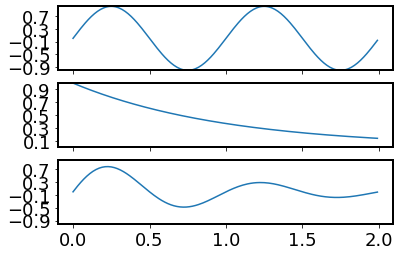

<Figure size 720x1080 with 0 Axes>

In [19]:
t = np.arange(0.0, 2.0, 0.01)

s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = s1 * s2

fig, axs = plt.subplots(3, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(-1, 1)

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[1].set_ylim(0, 1)

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[2].set_ylim(-1, 1)

plt.show()